# Practical Work: Fire Detection

In [1]:
import sys
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, random_split
from torchvision import datasets, transforms
from torchsummary import summary

import matplotlib.pyplot as plt

from datasets import WildfirePredictionDataset
from models import UNet, Classifier

In [2]:
# Set random seed for reproducability and dataset splitting
torch.manual_seed(42)

In [3]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(device)

cpu


## Exploring Data

In [4]:
# Define image transformation
transform = transforms.Compose([
    transforms.ToTensor()
])

# Load Wildfire Prediction Dataset dataset
dataset = WildfirePredictionDataset(split="valid", transform=transform)
print(len(dataset))

6300


In [ ]:
%%script false --no-raise-error
# Check sample sizes
sample_id = torch.randint(len(dataset), size=(1,)).item()
img, label = dataset[sample_id]
print(img.shape)
print(label)

In [ ]:
%%script false --no-raise-error
# Plot images and labels
cols, rows = 3, 3
figure = plt.figure(figsize=(cols*4, rows*4))
for i in range(1, cols * rows + 1):
    sample_id = torch.randint(len(dataset), size=(1,)).item()
    img, label = dataset[sample_id]
    figure.add_subplot(rows, cols, i)
    plt.title(f"{label} | {dataset.labels_dict[label]}")
    plt.axis("off")
    plt.imshow(img.permute(1, 2, 0))
plt.show()

## Loading Data

In [8]:
# Create training, validation and test data loaders
train_loader, valid_loader_1, valid_loader_2, test_loader = WildfirePredictionDataset.get_dataloaders(transform=transform, batch_size=16)

## SimCLR

### Image Reconstruction

In [17]:
id = 000
reconstruction_net = UNet()
# checkpoint = torch.load(f"train_res/checkpoint_best.pth.tar", weights_only=True)
# model.load_state_dict(checkpoint)
# model = model.eval().to(device)

In [ ]:
%%script false --no-raise-error
summary(reconstruction_net, input_size=(3, 350, 350))

In [19]:
batch_img, batch_label = next(iter(test_loader))
batch_encoder_out, batch_decoder_out = reconstruction_net(batch_img)

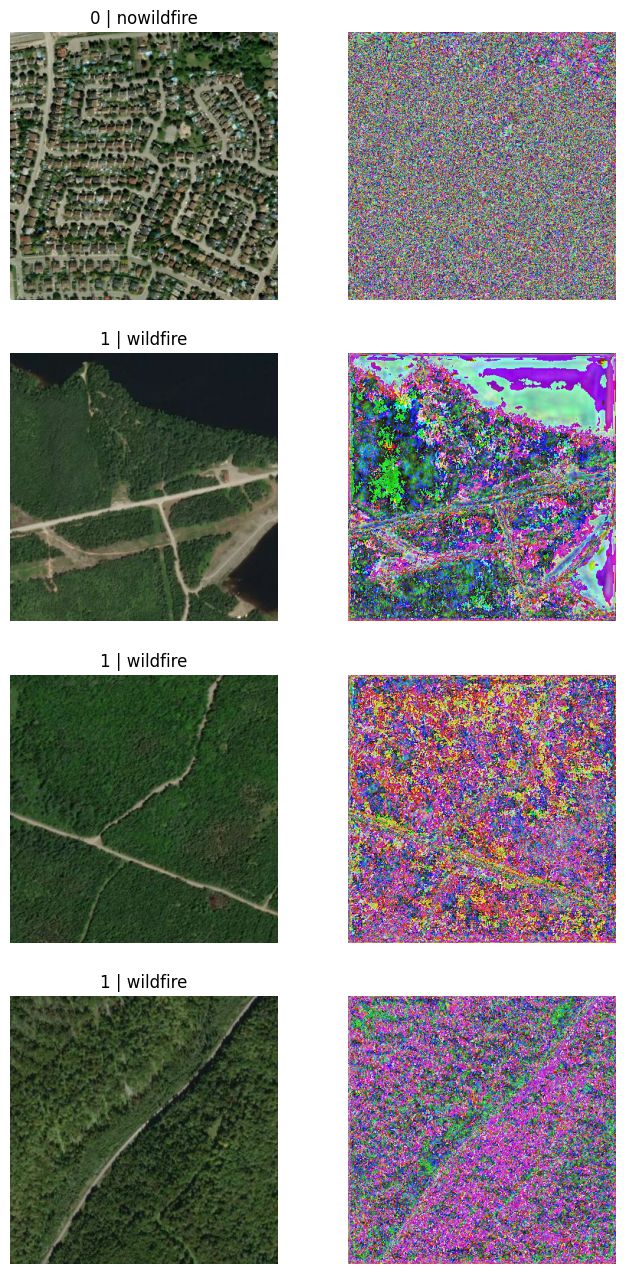

In [31]:
# %%script false --no-raise-error
# Plot images and reconstruction
rows = 4
cols = 2
fig, axs = plt.subplots(rows, cols, figsize=(cols*4, rows*4))
for i in range(rows):
	sample_id = torch.randint(batch_img.shape[0], size=(1,)).item()
	img, label = batch_img[sample_id], batch_label[sample_id].item()
	reconstruction = batch_decoder_out[sample_id]

	axs[i,0].imshow(img.permute(1, 2, 0))
	axs[i,0].set_title(f"{label} | {dataset.labels_dict[label]}")
	axs[i,0].axis("off")

	axs[i,1].imshow(transforms.ToPILImage()(reconstruction.squeeze().cpu()))
	axs[i,1].axis("off")
    
plt.show()

### Image Classification

In [ ]:
id = 000
reconstruction_net = Classifier()
checkpoint = torch.load(f"train_res/checkpoint_best.pth.tar", weights_only=True)
model.load_state_dict(checkpoint)
model = model.eval().to(device)